<font color="blue" size="5"> Problem description

<font color="blue" size="4"> To predict whether a company will go bankrupt / default in the following year, based on financial attributes of the company.

In [2]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


In [3]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

In [4]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

In [6]:
data = data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

<font color="blue" size="4">​ Feature X37 has too many missing values (almost half of the column), so I discarded it.

In [7]:
for col in data.columns:
    if data[col].notna().sum()<4000:
        print(col,data[col].notna().sum())

X37 2750


In [7]:
data.drop('X37',axis=1,inplace=True)

<font color="blue" size="4"> X_train and X_test will contain all the 'X' features except X37, and company Id is not used in the model because it is not related to probability of going bankrupt.

In [8]:
cols = list(data.columns)
cols.remove('Bankrupt')
cols.remove('Id')

<font color="blue" size="4"> Stratified train-test split

In [9]:
data['Bankrupt'].mean()

0.0639269406392694

In [10]:
from sklearn.model_selection import train_test_split
X = data[cols]
y = data['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

<font color="blue" size="4"> Option one: use KNN Imputer to fill all the missing values in X_train and then X_test. KNN finds the nearest neighbors of a data point, which are companies with similar financial conditions, so they are more likely to be of the same class.

In [14]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
X_train = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3854 non-null   float64
 1   X2      3854 non-null   float64
 2   X3      3854 non-null   float64
 3   X4      3854 non-null   float64
 4   X5      3854 non-null   float64
 5   X6      3854 non-null   float64
 6   X7      3854 non-null   float64
 7   X8      3854 non-null   float64
 8   X9      3854 non-null   float64
 9   X10     3854 non-null   float64
 10  X11     3854 non-null   float64
 11  X12     3854 non-null   float64
 12  X13     3854 non-null   float64
 13  X14     3854 non-null   float64
 14  X15     3854 non-null   float64
 15  X16     3854 non-null   float64
 16  X17     3854 non-null   float64
 17  X18     3854 non-null   float64
 18  X19     3854 non-null   float64
 19  X20     3854 non-null   float64
 20  X21     3854 non-null   float64
 21  X22     3854 non-null   float64
 22  

<font color="blue" size="4"> Or use MissForest (iterative imputing: Round Robin)

In [11]:
from missforest import MissForest

mf = MissForest()
X_train = mf.fit_transform(x=X_train)
X_train.info()

C:\Users\Richard Lu\anaconda3\Lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [12:43<00:00, 152.62s/it]
C:\Users\Richard Lu\anaconda3\Lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
C:\Users\Richard Lu\anaconda3\Lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 4618 to 1462
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X55     3854 non-null   float64
 1   X19     3854 non-null   float64
 2   X13     3854 non-null   float64
 3   X23     3854 non-null   float64
 4   X39     3854 non-null   float64
 5   X20     3854 non-null   float64
 6   X31     3854 non-null   float64
 7   X9      3854 non-null   float64
 8   X43     3854 non-null   float64
 9   X44     3854 non-null   float64
 10  X56     3854 non-null   float64
 11  X62     3854 non-null   float64
 12  X49     3854 non-null   float64
 13  X58     3854 non-null   float64
 14  X42     3854 non-null   float64
 15  X30     3854 non-null   float64
 16  X29     3854 non-null   float64
 17  X38     3854 non-null   float64
 18  X36     3854 non-null   float64
 19  X57     3854 non-null   float64
 20  X48     3854 non-null   float64
 21  X51     3854 non-null   float64
 22  X3

In [12]:
X_train = X_train[cols]
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
4618,0.009437,0.280290,0.240900,1.9586,-1.4515,0.00000,0.012014,2.5678,2.673500,0.71971,...,1139.3000,-0.057121,0.013112,0.99579,0.000000,10.796000,35.0100,34.308,10.6390,5.26480
2768,0.139940,0.386880,0.344970,2.1629,24.1170,0.00000,0.139940,1.5848,2.538800,0.61312,...,1423.9000,0.105260,0.228250,0.89545,0.024820,13.581000,7.1485,42.647,8.5587,7.08390
3214,0.146180,0.043863,0.201060,11.9150,3617.5000,0.00000,0.180480,21.7980,0.091483,0.95614,...,108720.0000,0.611010,0.152890,0.16476,0.000000,7.709900,23.5110,73.491,4.9666,0.11721
1720,0.256180,0.490520,0.378140,1.8929,43.2800,0.00000,0.256180,1.0387,3.246300,0.50948,...,6475.9000,0.135190,0.502810,0.86508,0.016898,10.677089,5.5527,47.618,7.6652,16.36700
2270,0.049513,0.250590,0.075223,1.4858,-26.4920,0.39721,0.061715,2.9906,0.930220,0.74941,...,1.4858,0.202720,0.000000,0.80648,0.127770,11.182000,8.9007,60.754,6.0078,1.20820


In [14]:
data.loc[X_train.index]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
4618,0.009437,0.280290,0.240900,1.95860,-1.4515,0.00000,0.012014,2.56780,2.673500,0.71971,...,0.013112,0.99579,0.000000,10.7960,35.0100,34.308,10.6390,5.26480,0,3580
2768,0.139940,0.386880,0.344970,2.16290,24.1170,0.00000,0.139940,1.58480,2.538800,0.61312,...,0.228250,0.89545,0.024820,13.5810,7.1485,42.647,8.5587,7.08390,0,2447
3214,0.146180,0.043863,0.201060,11.91500,3617.5000,0.00000,0.180480,21.79800,0.091483,0.95614,...,0.152890,0.16476,0.000000,7.7099,23.5110,73.491,4.9666,0.11721,0,4045
1720,0.256180,0.490520,0.378140,1.89290,43.2800,0.00000,0.256180,1.03870,3.246300,0.50948,...,0.502810,0.86508,0.016898,NaN,5.5527,47.618,7.6652,16.36700,0,1725
2270,0.049513,0.250590,0.075223,1.48580,-26.4920,0.39721,0.061715,2.99060,0.930220,0.74941,...,0.000000,0.80648,0.127770,11.1820,8.9007,60.754,6.0078,1.20820,0,3161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,0.117420,0.543760,0.046850,1.11200,-15.5810,0.00000,0.117420,0.83903,1.897500,0.45624,...,0.257370,0.93886,0.027440,19.0920,7.8179,80.492,4.5346,3.54870,0,2894
3952,0.161930,0.258750,0.337210,2.30800,75.3450,0.22326,0.204240,2.17280,1.156000,0.56220,...,0.288020,0.86509,0.001690,10.5650,3.1925,74.823,4.8782,3.10520,0,4603
783,-0.017271,0.944380,-0.243730,0.68242,-120.9000,-0.17916,-0.023916,0.01780,1.034500,0.01681,...,-1.027400,0.96668,10.525000,6.1891,6.5422,171.590,2.1271,3.42760,0,2063
245,0.008390,0.860690,-0.454120,0.47237,-302.7600,0.21384,0.006131,0.15856,1.132300,0.13647,...,0.061474,0.88314,0.000000,5.0405,5.8725,335.240,1.0888,1.57910,0,1246


In [15]:
X_test = mf.transform(x=X_test)
X_test.info()

C:\Users\Richard Lu\anaconda3\Lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
C:\Users\Richard Lu\anaconda3\Lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:01,  1.81it/s]C:\Users\Richard Lu\anaconda3\Lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
C:\Users\Richard Lu\anaconda3\Lib\site-

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 814 to 2279
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X55     964 non-null    float64
 1   X19     964 non-null    float64
 2   X13     964 non-null    float64
 3   X23     964 non-null    float64
 4   X39     964 non-null    float64
 5   X20     964 non-null    float64
 6   X31     964 non-null    float64
 7   X9      964 non-null    float64
 8   X43     964 non-null    float64
 9   X44     964 non-null    float64
 10  X56     964 non-null    float64
 11  X62     964 non-null    float64
 12  X49     964 non-null    float64
 13  X58     964 non-null    float64
 14  X42     964 non-null    float64
 15  X30     964 non-null    float64
 16  X29     964 non-null    float64
 17  X38     964 non-null    float64
 18  X36     964 non-null    float64
 19  X57     964 non-null    float64
 20  X48     964 non-null    float64
 21  X51     964 non-null    float64
 22  X35 

In [16]:
X_test = X_test[cols]
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
814,0.045229,0.65227,0.534870,4.3717,76.3530,-0.11997,0.045229,0.47397,1.0607,0.30915,...,16044.0,0.057211,0.14630,0.94279,1.596700,5.7362,3.9832,40.876,8.9294,4.6216
1780,0.034805,0.76512,0.044942,1.1122,-49.1050,0.00000,0.034805,0.30698,1.2790,0.23488,...,1914.2,0.413000,0.14818,0.58781,0.903690,10.4580,4.0773,114.330,3.1926,2.3068
3376,0.045343,0.43138,0.335890,1.7932,58.3180,0.12073,0.057715,0.49080,1.0506,0.21172,...,10486.0,0.048141,0.21417,0.95186,0.037256,32.5740,4.9828,84.935,4.2974,7.5633
1970,0.085955,0.13373,0.262710,3.1082,46.8070,0.25202,0.107090,5.93740,1.1284,0.79401,...,27553.0,0.113760,0.10825,0.88624,0.011476,5.7066,5.0119,48.824,7.4759,1.5206
4732,0.094349,0.32668,0.172560,1.6427,2.6466,0.00000,0.094349,2.06110,1.6354,0.67332,...,1519.4,0.052012,0.14013,0.94348,0.004420,11.3760,5.9476,59.921,6.0914,2.9258


In [18]:
data.loc[X_test.index]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
814,0.045229,0.65227,0.534870,4.3717,76.3530,-0.119970,0.045229,0.47397,1.06070,0.30915,...,0.146300,0.94279,1.596700,5.7362,3.9832,40.876,8.9294,4.62160,0,2715
1780,0.034805,0.76512,0.044942,1.1122,-49.1050,0.000000,0.034805,0.30698,1.27900,0.23488,...,0.148180,0.58781,0.903690,10.4580,4.0773,114.330,3.1926,2.30680,0,2065
3376,0.045343,0.43138,0.335890,1.7932,58.3180,0.120730,0.057715,0.49080,1.05060,0.21172,...,0.214170,0.95186,0.037256,32.5740,4.9828,84.935,4.2974,7.56330,0,5582
1970,0.085955,0.13373,0.262710,3.1082,46.8070,0.252020,0.107090,5.93740,1.12840,0.79401,...,0.108250,0.88624,0.011476,5.7066,5.0119,48.824,7.4759,1.52060,0,3043
4732,0.094349,0.32668,0.172560,1.6427,2.6466,0.000000,0.094349,2.06110,1.63540,0.67332,...,0.140130,0.94348,0.004420,11.3760,5.9476,59.921,6.0914,2.92580,0,1283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,0.004701,0.74872,0.070571,1.0943,-34.3190,0.012488,0.004701,0.27871,1.00370,0.20868,...,0.022527,0.99632,0.000000,8.7677,8.3348,78.472,4.6513,19.27200,0,5580
3401,0.016496,0.30022,0.339030,2.1393,38.8960,0.000000,0.016496,2.33090,1.58820,0.69978,...,0.023573,0.81848,0.000000,6.5888,4.5278,68.389,5.3371,4.37030,0,4893
3556,-0.032789,0.33384,0.013587,1.0776,-77.4400,-0.000663,-0.041420,1.66760,0.95349,0.55671,...,-0.058898,1.04880,0.285200,4.4441,8.8960,120.210,3.0363,0.65515,0,4764
321,0.090402,0.10255,0.588930,7.6484,83.0890,0.000000,0.112860,8.75130,2.17960,0.89745,...,0.100730,0.94846,0.000000,22.5250,20.6050,14.834,24.6060,6.75860,0,3395


<font color="blue" size="4"> Use sklearn PolynomialFeatures to automatically create new features

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)   

X_train_poly = poly.transform(X_train)
X_test_poly  = poly.transform(X_test)

feat_names = poly.get_feature_names_out(input_features=X_train.columns)
X_train_poly = pd.DataFrame(X_train_poly, columns=feat_names, index=X_train.index)
X_test_poly  = pd.DataFrame(X_test_poly,  columns=feat_names, index=X_test.index)

PolynomialFeatures(include_bias=False)

In [20]:
X_train_poly.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X61^2,X61 X62,X61 X63,X61 X64,X62^2,X62 X63,X62 X64,X63^2,X63 X64,X64^2
4618,0.009437,0.280290,0.240900,1.9586,-1.4515,0.00000,0.012014,2.5678,2.673500,0.71971,...,1225.700100,1201.123080,372.471390,184.320648,1177.038864,365.002812,180.624758,113.188321,56.012207,27.718119
2768,0.139940,0.386880,0.344970,2.1629,24.1170,0.00000,0.139940,1.5848,2.538800,0.61312,...,51.101052,304.862079,61.181867,50.639259,1818.766609,365.002879,302.107083,73.251346,60.628975,50.181639
3214,0.146180,0.043863,0.201060,11.9150,3617.5000,0.00000,0.180480,21.7980,0.091483,0.95614,...,552.767121,1727.846901,116.769733,2.755724,5400.927081,365.000401,8.613880,24.667116,0.582135,0.013738
1720,0.256180,0.490520,0.378140,1.8929,43.2800,0.00000,0.256180,1.0387,3.246300,0.50948,...,30.832477,264.408469,42.562556,90.881041,2267.473924,365.001494,779.363806,58.755291,125.456328,267.878689
2270,0.049513,0.250590,0.075223,1.4858,-26.4920,0.39721,0.061715,2.9906,0.930220,0.74941,...,79.222460,540.753128,53.473625,10.753826,3691.048516,364.997881,73.402983,36.093661,7.258624,1.459747


In [21]:
X_test_poly.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X61^2,X61 X62,X61 X63,X61 X64,X62^2,X62 X63,X62 X64,X63^2,X63 X64,X64^2
814,0.045229,0.65227,0.534870,4.3717,76.3530,-0.11997,0.045229,0.47397,1.0607,0.30915,...,15.865882,162.817283,35.567586,18.408757,1670.847376,364.998154,188.912522,79.734184,41.268115,21.359187
1780,0.034805,0.76512,0.044942,1.1122,-49.1050,0.00000,0.034805,0.30698,1.2790,0.23488,...,16.624375,466.157709,13.017188,9.405516,13071.348900,365.009958,263.736444,10.192695,7.364690,5.321326
3376,0.045343,0.43138,0.335890,1.7932,58.3180,0.12073,0.057715,0.49080,1.0506,0.21172,...,24.828296,423.214118,21.413085,37.686411,7213.954225,364.999669,642.388886,18.467647,32.502525,57.203507
1970,0.085955,0.13373,0.262710,3.1082,46.8070,0.25202,0.107090,5.93740,1.1284,0.79401,...,25.119142,244.701006,37.468463,7.621095,2383.782976,365.003342,74.241774,55.889081,11.367854,2.312224
4732,0.094349,0.32668,0.172560,1.6427,2.6466,0.00000,0.094349,2.06110,1.6354,0.67332,...,35.373946,356.386140,36.229211,17.401488,3590.526241,365.002779,175.316862,37.105154,17.822218,8.560306


<font color="blue" size="4"> Plot the correlation matrix of X_train features in the form of a heat map. Many features are highly correlated with each other.

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

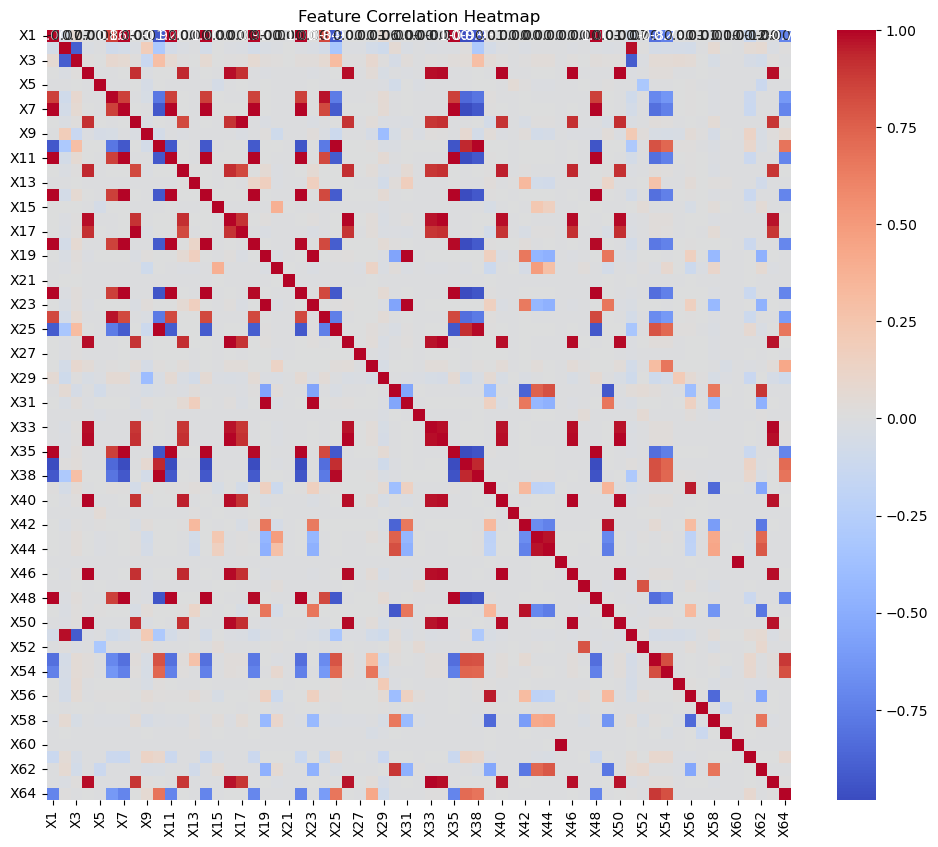

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

<font color="blue" size="4"> Standardize X_train_poly and X_test_poly by removing the mean and dividing by the standard deviation of each column, so all columns are on similar scales (not necessary for tree based models but needed for neural networks and logistic regressions)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_poly)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train_poly.columns),index=X_train_poly.index)

In [25]:
X_train_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X61^2,X61 X62,X61 X63,X61 X64,X62^2,X62 X63,X62 X64,X63^2,X63 X64,X64^2
4618,0.011783,-0.192527,0.042441,-0.093749,-0.004868,0.015318,0.010367,-0.040425,0.837808,0.044994,...,-0.026417,-0.024678,0.175632,-0.017751,-0.022812,0.053642,-0.045720,-0.020251,-0.059820,-0.025753
2768,0.029196,-0.111504,0.120655,-0.081760,-0.003914,0.015318,0.027435,-0.059335,0.735642,0.021363,...,-0.049179,-0.029242,-0.054304,-0.020521,-0.022809,0.053645,-0.042512,-0.021298,-0.058833,-0.025751
3214,0.030029,-0.372242,0.012499,0.490532,0.130102,0.015318,0.032844,0.329506,-1.120567,0.097410,...,-0.039458,-0.021997,-0.013243,-0.021514,-0.022797,0.053518,-0.050262,-0.022571,-0.071659,-0.025755
1720,0.044706,-0.032724,0.145584,-0.097605,-0.003200,0.015318,0.042944,-0.069840,1.272258,-0.001613,...,-0.049572,-0.029448,-0.068057,-0.019688,-0.022808,0.053574,-0.029909,-0.021678,-0.044987,-0.025738
2270,0.017130,-0.215103,-0.082075,-0.121495,-0.005802,0.066449,0.016998,-0.032291,-0.484413,0.051578,...,-0.048634,-0.028041,-0.059997,-0.021348,-0.022803,0.053388,-0.048551,-0.022272,-0.070233,-0.025754


In [26]:
X_test_scaled = scaler.transform(X_test_poly)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test_poly.columns),index=X_test_poly.index)
X_test_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X61^2,X61 X62,X61 X63,X61 X64,X62^2,X62 X63,X62 X64,X63^2,X63 X64,X64^2
814,0.016559,0.090227,0.263375,0.047861,-0.001966,-0.000125,0.014799,-0.080704,-0.385448,-0.046026,...,-0.049862,-0.029965,-0.073224,-0.021189,-0.022810,0.053402,-0.045501,-0.021128,-0.062969,-0.025753
1780,0.015168,0.176008,-0.104833,-0.143420,-0.006645,0.015318,0.013408,-0.083916,-0.219874,-0.062491,...,-0.049847,-0.028421,-0.089881,-0.021376,-0.022769,0.054009,-0.043525,-0.022951,-0.070210,-0.025754
3376,0.016574,-0.077678,0.113831,-0.103456,-0.002639,0.030859,0.016465,-0.080380,-0.393108,-0.067626,...,-0.049688,-0.028639,-0.083679,-0.020790,-0.022790,0.053480,-0.033526,-0.022734,-0.064841,-0.025751
1970,0.021993,-0.303932,0.058832,-0.026286,-0.003068,0.047759,0.023052,0.024396,-0.334100,0.061466,...,-0.049683,-0.029548,-0.071820,-0.021413,-0.022807,0.053669,-0.048529,-0.021753,-0.069355,-0.025754
4732,0.023113,-0.157264,-0.008921,-0.112288,-0.004715,0.015318,0.021352,-0.050172,0.050443,0.034709,...,-0.049484,-0.028980,-0.072735,-0.021210,-0.022803,0.053640,-0.045860,-0.022245,-0.067977,-0.025754


<font color="blue" size="4"> Too many features, use PCA to reduce dimensions 

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')  
X_train_pca = pca.fit_transform(X_train_scaled)

n_components = pca.n_components_
print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 57


In [29]:
X_test_pca = pca.transform(X_test_scaled)
X_test_pca.shape

(964, 57)

<font color="red" size="4"> Assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

<font color="blue" size="4"> False negative is 5 times worse than false positive. We should emphasize improving the true positive rate by increasing recall (True Positives / (True Positives + False Negatives)) over increasing precision, although an optimal model should do well in all three aspects (accuracy, precision, and recall).

<font color="blue" size="4"> Here I trained a logistic regression model to predict bankruptcy using GridSearchCV. For hyperparameters, different values of C (which is inversely proportional to regularization power) and penalty terms (L1 vs L2) are tried. There are two GridSearch instances performed：the first looks for the hyperparameter set that has the highest accuracy score in cross validation (calculated as the average for all 5 folds) and the second looks for another set that has the highest recall score in cross validation. An optimal hyperparameter set will have both high accuracy and high recall.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
     'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
      'penalty': ['l1', 'l2'],
     'solver': ['liblinear']  
 }

#  ###############################################################################
#  # 1) Grid Search for Accuracy
#  ###############################################################################
grid_search_acc = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,
    n_jobs=-1
  )
grid_search_acc.fit(X_train_pca, y_train)

print("=== Best for Accuracy ===")
print("Best hyperparams:", grid_search_acc.best_params_)
print("Best CV accuracy:", grid_search_acc.best_score_)

# ###############################################################################
# # 2) Grid Search for Recall
# ###############################################################################
grid_search_rec = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='recall',    
    cv=5,
    n_jobs=-1
 )
grid_search_rec.fit(X_train_pca, y_train)

print("\n=== Best for Recall ===")
print("Best hyperparams:", grid_search_rec.best_params_)
print("Best CV recall:", grid_search_rec.best_score_)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

=== Best for Accuracy ===
Best hyperparams: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.9351326494517156


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall')


=== Best for Recall ===
Best hyperparams: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV recall: 0.1340408163265306


<font color="blue" size="4"> It can be seen that the two approaches lead to very different C values. The highest accuracy score is 0.94 which seems decent, but the highest recall that can be achieved is only 0.1, so only 1 in 10 comapnies that will go bankrupt is correctly identified, which is very bad. 

In [30]:
data['Bankrupt'].mean()

0.0639269406392694

<font color="blue" size="4"> A closer look at the labels reveal that the two classes are very imbalanced: only about 6 percent of the companies in the training data actually go bankrupt/default, so the model may fail to learn the characteristics of companies that go bankrupt and predict all of them as negative (not bankrupt), which leads to high accuracy and low recall.

<font color="blue" size="4"> We can use SMOTEENN to create artificial samples for the minority class (statistically inferred from existing samples) and then remove samples that are close to the boundary to make sure the number of samples for the two classes are closer to each other, thus the model can equally learn about the nature of the positive and negative classes.

In [188]:
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

smote_enn = SMOTEENN(random_state=42, enn=EditedNearestNeighbours(n_neighbors=3, sampling_strategy='all'))
X_train_res, y_train_res = smote_enn.fit_resample(X_train_pca, y_train)

print("Resampled class distribution:", Counter(y_train_res))

Resampled class distribution: Counter({1: 3453, 0: 2725})


<font color="blue" size="4"> Since now we have a closer number of bankrupt and non-bankrupt companies, the three metrics: accuracy, recall, and precision are better aligned together. For example, a low recall is going to lead to low accuracy because more than half of the training set is now positive(bankrupt).

In [ ]:
grid_search_acc.fit(X_train_res, y_train_res)
print("=== Best for Accuracy ===")
print("Best hyperparams:", grid_search_acc.best_params_)
print("Best CV accuracy:", grid_search_acc.best_score_)

In [23]:
#grid_search_rec.fit(X_train_resampled, y_train_resampled)

print("\n=== Best for Recall ===")
print("Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}")
print("Best CV recall: 0.7731707317073171")


=== Best for Recall ===
Best hyperparams: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV recall: 0.7731707317073171


<font color="blue" size="5"> Logistic regression is only a benchmark. Tree based models are likely to outperform it, so below I tried RandomForest and Xgboost, using RandomizedSearchCV with accuracy score as the criterion. RandomizedSearchCV enables us to randomly select hyperparameter values from a given range and distribution, like uniform distribution. The total number of hyperparameter sets tried is specified by the user. I still used SMOTEENN augmented data to train.

In [24]:
from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(random_state=42)

# param_dist = {
#     'n_estimators': randint(50, 300),       
#     'max_depth': randint(10, 30),            
#     'min_samples_split': randint(2, 10),    
#     'min_samples_leaf': randint(1, 10),     
#     'max_features': uniform(0.4, 0.6),
#     'max_samples': uniform(0.6,0.4)
# }

# rand_search_rf = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=100,             
#     scoring='accuracy',    
#     cv=5,                  
#     random_state=42,       
#     n_jobs=-1              
# )

# rand_search_rf.fit(X_train_resampled, y_train_resampled)

# print("Best hyperparameters:", rand_search_rf.best_params_)
# print("Best CV score:", rand_search_rf.best_score_)

print("Best hyperparameters: {'max_depth': 22, 'max_features': 0.4845545349848576, 'max_samples': 0.9208787923016158, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}")
print("Best CV score: 0.9648558758314856")

Best hyperparameters: {'max_depth': 22, 'max_features': 0.4845545349848576, 'max_samples': 0.9208787923016158, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Best CV score: 0.9648558758314856


<font color="blue" size="4"> Features like number of trees, tree max depth and proportion of total features considered for each split can prevent trees from becoming too complicated and overfitting on data. The highest cross validation accuracy score is 0.96 for RandomForest.

<font color="blue" size="4"> Xgboost has some similar hyperparameters like RandomForest due to tree-based nature, but since it's boosting we can choose different learning rates. Xgboost also comes with built-in regularization effects (L1 & L2). The highest cross validated accuracy score is 0.98 for Xgboost.

In [189]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

xgb = XGBClassifier(eval_metric='logloss',random_state=42)

param_dist = {
     'n_estimators': randint(50, 300),      
     'max_depth': randint(3, 15),            
     'learning_rate': uniform(0.01, 0.19),     
     'subsample': uniform(0.6, 0.4),           
     'colsample_bytree': uniform(0.6, 0.4)
 }

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

rand_search = RandomizedSearchCV(
     estimator=xgb,
     param_distributions=param_dist,
     n_iter=50,           
     scoring='accuracy',  
     cv=skf,
     random_state=42,
     refit=True,
     n_jobs=-1
 )

rand_search.fit(X_train_res, y_train_res)

print("Best hyperparameters:", rand_search.best_params_)
print("Best CV score:", rand_search.best_score_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           imp...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002A1456063D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002A1455ECED0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002A143196050>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002A100071550>},
                   random_state=42, scoring='accuracy')

Best hyperparameters: {'colsample_bytree': 0.6390688456025535, 'learning_rate': 0.14000427503730983, 'max_depth': 14, 'n_estimators': 248, 'subsample': 0.8439986631130484}
Best CV score: 0.9794430250383239


<font color="blue" size="4"> The Xgboost model can achieve 100% recall for in-sample training data from the original pca reduced dataset 

In [190]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
recall_score(y_train, rand_search.best_estimator_.predict(X_train_pca))

1.0

In [191]:
precision_score(y_train, rand_search.best_estimator_.predict(X_train_pca))

0.42857142857142855

In [192]:
accuracy_score(y_train, rand_search.best_estimator_.predict(X_train_pca))

0.9148936170212766

In [128]:
y_train.mean()

0.06382978723404255

In [129]:
y_test.mean()

0.06431535269709543

<font color="blue" size="4"> Now use test set to evaluate model, there is tradeoff between recall vs accuracy and precision

In [193]:
recall_score(y_test, rand_search.best_estimator_.predict(X_test_pca))

0.6451612903225806

In [194]:
precision_score(y_test, rand_search.best_estimator_.predict(X_test_pca))

0.23668639053254437

In [195]:
accuracy_score(y_test, rand_search.best_estimator_.predict(X_test_pca))

0.8433609958506224

In [196]:
from sklearn.metrics import roc_auc_score, roc_curve

y_score = rand_search.best_estimator_.predict_proba(X_test_pca)[:, 1]

auc = roc_auc_score(y_test, y_score)
auc

0.8201666547457264

<font color="blue" size="4"> Plot ROC curve (true positive vs false positive)

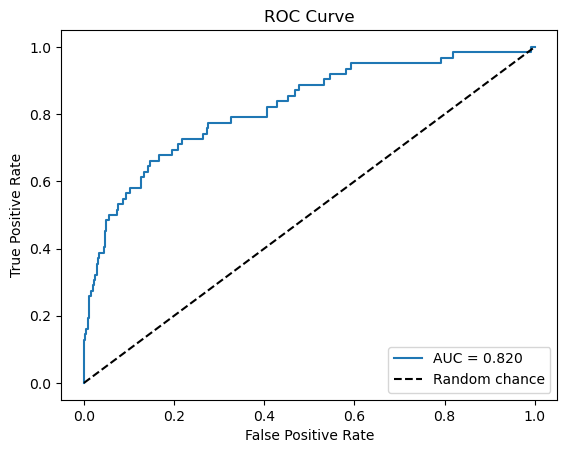

In [198]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label="Random chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show();